In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [3]:
netflix_data = pd.read_csv("Netflix.csv")

In [5]:
netflix_data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [7]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [9]:
netflix_data.shape

(24812, 6)

In [11]:
netflix_data.isnull().sum()

Title                      0
Available Globally?        0
Release Date           16646
Hours Viewed               0
Language Indicator         0
Content Type               0
dtype: int64

In [13]:
#Cleaning and processing 
netflix_data['Hours Viewed']  = netflix_data["Hours Viewed"].replace(',','', regex=True).astype(float)
netflix_data[['Title', 'Hours Viewed']].head()

,Title,Hours Viewed
0,The Night Agent: Season 1,812100000.0
1,Ginny & Georgia: Season 2,665100000.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0
3,Wednesday: Season 1,507700000.0
4,Queen Charlotte: A Bridgerton Story,503000000.0


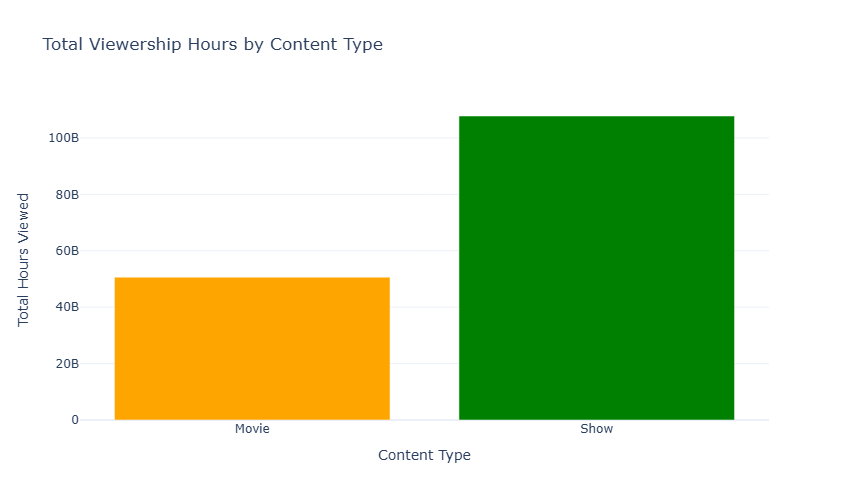

In [19]:
#Viewership houirs between show and movies
content_type_view = netflix_data.groupby('Content Type')['Hours Viewed'].sum()

figu = go.Figure(data=[
    go.Bar(
        x = content_type_view.index,
        y = content_type_view.values,
        marker_color = ['orange', 'green']
    )
])

figu.update_layout (
    title = 'Total Viewership Hours by Content Type',
    xaxis_title = 'Content Type',
    yaxis_title = 'Total Hours Viewed',
    xaxis_tickangle = 0,
    height = 500,
    width = 800
)

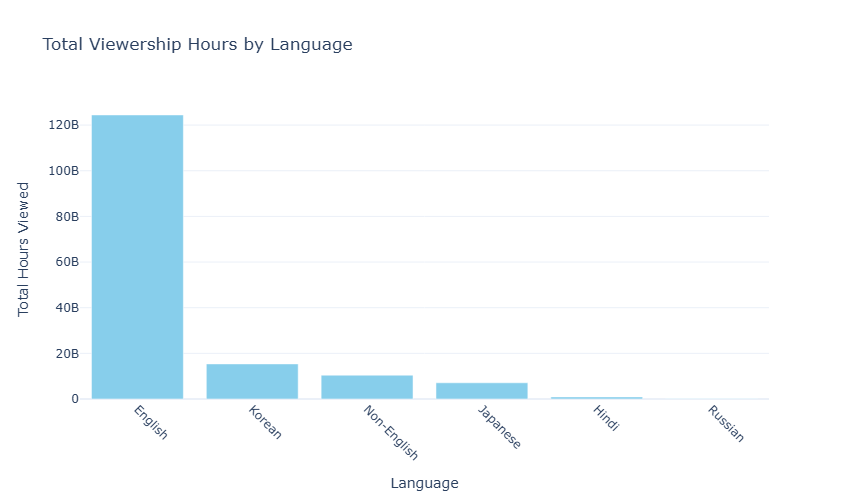

In [23]:
language_view = netflix_data.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending=False)

fig = go.Figure(data=[
    go.Bar(
        x = language_view.index,
        y = language_view.values,
        marker_color ='skyblue'
    )
])

fig.update_layout (
    title = 'Total Viewership Hours by Language',
    xaxis_title = 'Language',
    yaxis_title = 'Total Hours Viewed',
    xaxis_tickangle = 45,
    height = 500,
    width = 900
)

fig.show()

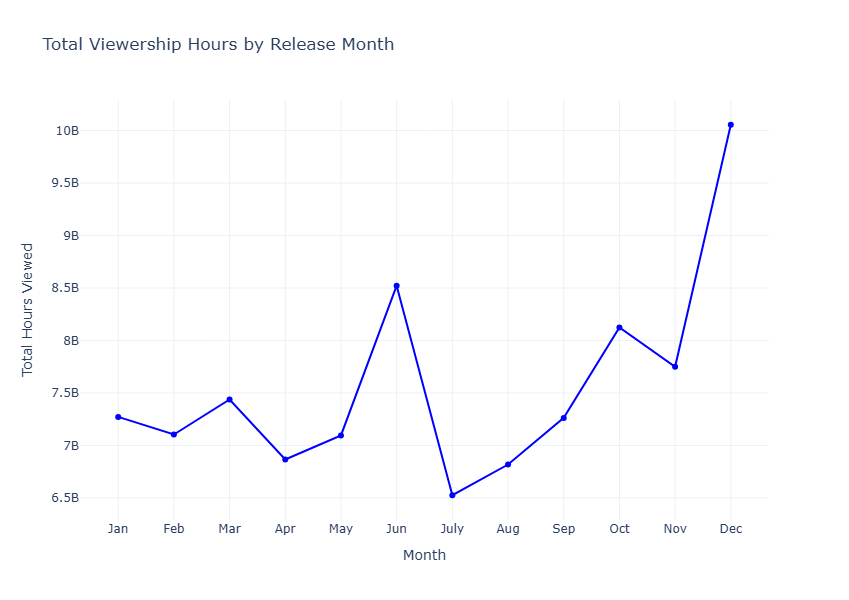

In [39]:
#Release Date Viewership
netflix_data['Release Date'] = pd.to_datetime(netflix_data['Release Date'])
netflix_data['Release Month'] = netflix_data['Release Date'].dt.month

monthly_view = netflix_data.groupby('Release Month')['Hours Viewed'].sum()

fig = go.Figure(data=[
    go.Scatter(
        x = monthly_view.index,
        y = monthly_view.values,
        mode = 'lines+markers',
        marker = dict(color='blue'),
        line = dict(color='blue')
    )
])

fig.update_layout (
    title = 'Total Viewership Hours by Release Month',
    xaxis_title = 'Month',
    yaxis_title = 'Total Hours Viewed',
    xaxis = dict(
        tickmode = 'array',
        tickvals = list(range(1,13)),
        ticktext = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    height = 600,
    width = 1000
)

fig.show()

In [43]:
#Extracting top 5 titles based on view
top_5 = netflix_data.nlargest(5, 'Hours Viewed')
top_5[['Title', 'Hours Viewed', 'Language Indicator', 'Content Type', 'Release Date']]

,Title,Hours Viewed,Language Indicator,Content Type,Release Date
0,The Night Agent: Season 1,812100000.0,English,Show,2023-03-23
1,Ginny & Georgia: Season 2,665100000.0,English,Show,2023-01-05
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,630200000.0,Korean,Movie,2023-06-17
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0,Korean,Show,2022-12-30
18214,ONE PIECE: Season 1,541900000.0,English,Show,2023-08-31


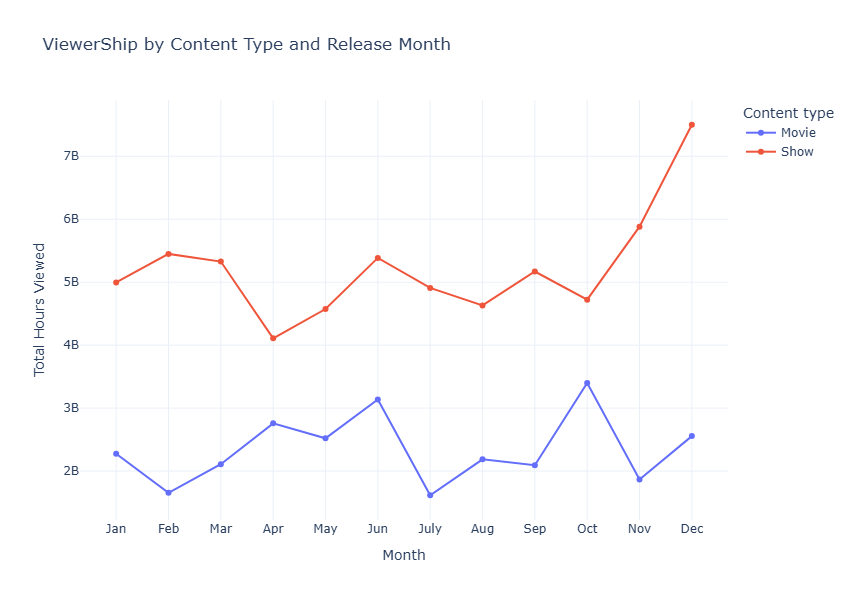

In [53]:
monthly_view_by_type = netflix_data.pivot_table(index='Release Month',
                                               columns='Content Type',
                                                values='Hours Viewed',
                                                aggfunc ='sum'
                                               )
fig = go.Figure()

for content_type in monthly_view_by_type.columns:
    fig.add_trace(
        go.Scatter(
            x=monthly_view_by_type.index,
            y = monthly_view_by_type[content_type],
            mode='lines+markers',
            name=content_type
        )
    )

fig.update_layout(
    title='ViewerShip by Content Type and Release Month',
    xaxis_title ='Month',
    yaxis_title = 'Total Hours Viewed',
    xaxis = dict(
        tickmode='array',
        tickvals=list(range(1,13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),                  
    height = 600,
    width=1000,
    legend_title='Content type'

)

fig.show()

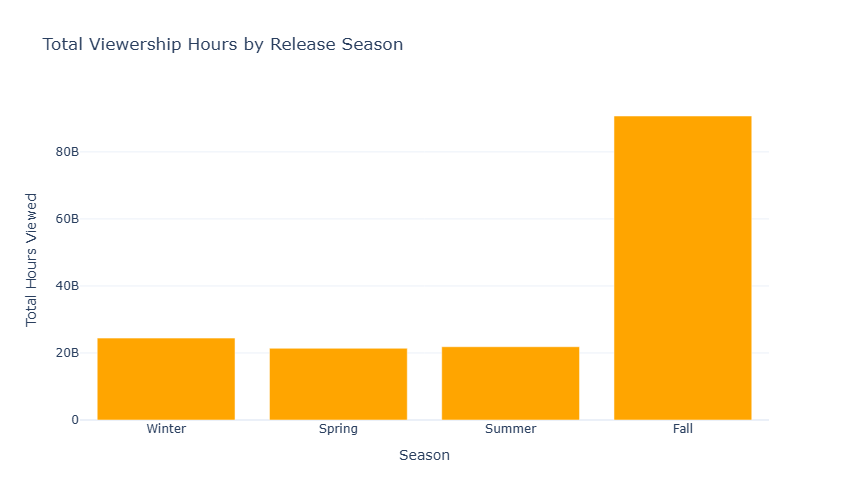

In [57]:
#Viewership Hours on Season based release month

def get_season(month):
    if month in [12,1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

netflix_data['Release Season'] = netflix_data['Release Month'].apply(get_season)

seasonal_view = netflix_data.groupby('Release Season')['Hours Viewed'].sum()
season_order =['Winter','Spring','Summer', 'Fall']

seasonal_view = seasonal_view.reindex(season_order)

fig = go.Figure(data=[
    go.Bar(
        x=seasonal_view.index,
        y=seasonal_view.values,
        marker_color='orange'
    )
])

fig.update_layout(
    title='Total Viewership Hours by Release Season',
    xaxis_title='Season',
    yaxis_title='Total Hours Viewed',
    xaxis_tickangle=0,
    height=500,
    width=800,
    xaxis=dict(
        categoryorder='array',
        categoryarray=season_order
    )
)

fig.show()

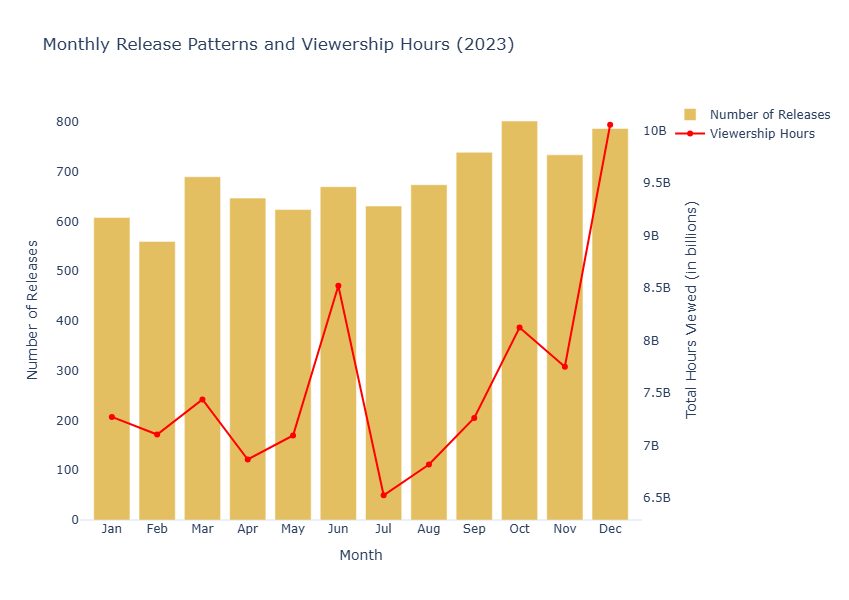

In [62]:
#No of content released and their view

monthly_releases = netflix_data['Release Month'].value_counts().sort_index()

monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum()

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=monthly_releases.index,
        y=monthly_releases.values,
        name='Number of Releases',
        marker_color='goldenrod', 
        opacity=0.7,
        yaxis='y1'
    )
)

fig.add_trace(
    go.Scatter(
        x=monthly_viewership.index,
        y=monthly_viewership.values,
        name='Viewership Hours',
        mode='lines+markers',
        marker=dict(color='red'),
        line=dict(color='red'),
        yaxis='y2'
    )
)

fig.update_layout(
    title='Monthly Release Patterns and Viewership Hours (2023)',
    xaxis=dict(
        title='Month',
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    yaxis=dict(
        title='Number of Releases',
        showgrid=False,
        side='left'
    ),
    yaxis2=dict(
        title='Total Hours Viewed (in billions)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(
        x=1.05,  
        y=1,
        orientation='v',
        xanchor='left'
    ),
    height=600,
    width=1000
)

fig.show()

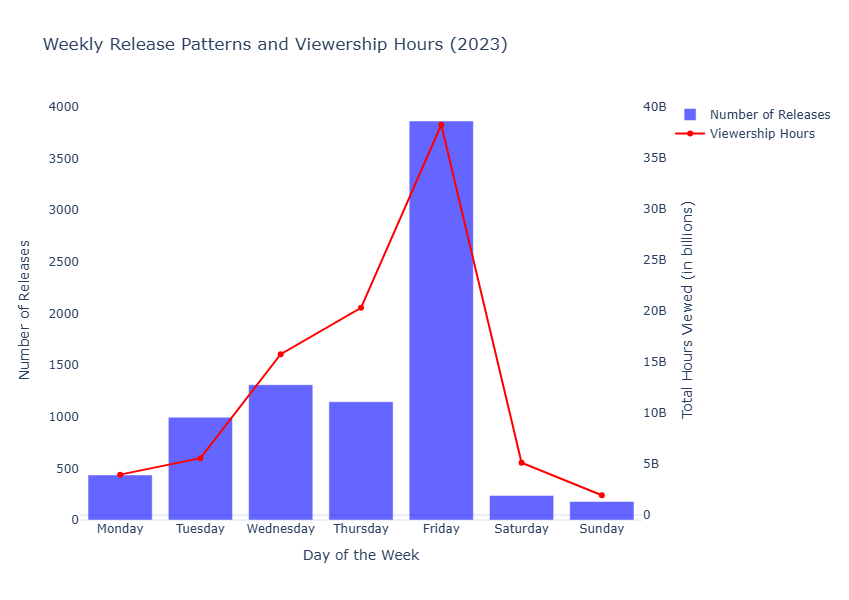

In [64]:
#Netflix has preference for releasing content or specifi week-day

netflix_data['Release Day'] = netflix_data['Release Date'].dt.day_name()

weekday_releases = netflix_data['Release Day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# aggregate viewership hours by day of the week
weekday_viewership = netflix_data.groupby('Release Day')['Hours Viewed'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=weekday_releases.index,
        y=weekday_releases.values,
        name='Number of Releases',
        marker_color='blue',
        opacity=0.6,
        yaxis='y1'
    )
)

fig.add_trace(
    go.Scatter(
        x=weekday_viewership.index,
        y=weekday_viewership.values,
        name='Viewership Hours',
        mode='lines+markers',
        marker=dict(color='red'),
        line=dict(color='red'),
        yaxis='y2'
    )
)

fig.update_layout(
    title='Weekly Release Patterns and Viewership Hours (2023)',
    xaxis=dict(
        title='Day of the Week',
        categoryorder='array',
        categoryarray=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ),
    yaxis=dict(
        title='Number of Releases',
        showgrid=False,
        side='left'
    ),
    yaxis2=dict(
        title='Total Hours Viewed (in billions)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(
        x=1.05,  
        y=1,
        orientation='v',
        xanchor='left'
    ),
    height=600,
    width=1000
)

fig.show()

In [66]:
#High Impact Dates ('holidays', 'major events') 

important_dates = [
    '2023-01-01',  # new year's day
    '2023-02-14',  # valentine's ay
    '2023-07-04',  # independence day (US)
    '2023-10-31',  # halloween
    '2023-12-25'   # christmas day
]

# convert to datetime
important_dates = pd.to_datetime(important_dates)

# check for content releases close to these significant holidays (within a 3-day window)
holiday_releases = netflix_data[netflix_data['Release Date'].apply(
    lambda x: any((x - date).days in range(-3, 4) for date in important_dates)
)]

# aggregate viewership hours for releases near significant holidays
holiday_viewership = holiday_releases.groupby('Release Date')['Hours Viewed'].sum()

holiday_releases[['Title', 'Release Date', 'Hours Viewed']]

,Title,Release Date,Hours Viewed
2,The Glory: Season 1 // 더 글로리: 시즌 1,2022-12-30,622800000.0
6,La Reina del Sur: Season 3,2022-12-30,429600000.0
11,Kaleidoscope: Limited Series,2023-01-01,252500000.0
29,Perfect Match: Season 1,2023-02-14,176800000.0
124,Lady Voyeur: Limited Series // Olhar Indiscret...,2022-12-31,86000000.0
...,...,...,...
22324,The Romantics: Limited Series,2023-02-14,1000000.0
22327,Aggretsuko: Season 5 // アグレッシブ烈子: シーズン5,2023-02-16,900000.0
22966,The Lying Life of Adults: Limited Series // La...,2023-01-04,900000.0
22985,Community Squad: Season 1 // División Palermo:...,2023-02-17,800000.0
